# Visualisatie

Mensen zijn behoorlijk visueel ingesteld. Het helpt enorm om je data te plotten om verbanden te ontdekken, of om anderen van je inzichten te overtuigen. In dit derde deel van de cursus gaan we dan ook in op datavisualisatie. Ook daarvoor biedt Python heel veel functionaliteit. We zullen een par paketten laten langskomen:
- matplotlib: de standaard voor statische plots in Python. De mogelijkheden zijn legio. De naam, en voor een goed deel ook de syntax, komt van Matlab.
- seaborn: een pakket speciaal voor statische visualisaties. Deze hebben een mooiere styling dan matplotlib en iets meer statistische functionaliteiten.
- bokeh: een Python interface naar een javascript plotting library. Veel mogelijkheden tot het maken van interactieve graphics.
- altair: new kid on the block. Hogere level API voor plotten. Naar hun eigen zeggen: "With Altair, you can spend more time understanding your data and its meaning. Altair’s API is simple, friendly and consistent and built on top of the powerful Vega-Lite visualization grammar. This elegant simplicity produces beautiful and effective visualizations with a minimal amount of code."

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Matplotlib

Matplotlib kan op twee manieren gebruikt worden. Deze heten, met technische termen, de interactieve manier en de object-georienteerde manier. Dat klinkt ingewikkeld, maar het verschil zal je snel duidelijk worden. We zullen ze hier allebei laten langskomen.

Zoals je in de imports al kan zien is het een package van matplotlib die meestal wordt ingeladen: matplotlib.pyplot. De afkorting die hiervoor gebruikelijk is, is plt. Je ziet dat de gemaakte plotjes netjes tussen de cellen in in je notebook verschijnen. Matplotlib kent enorm veel mogelijkheden. We zullen hier een aantal aspecten bekijken via een paar voorbeelde. Opgaven en huiswerk dienen vooral ter verbreding van die basis.

### De interactive modus: snel en eenvoudig een flexibele plot
De interactieve modus laat je feitelijk werken aan 1 figuur tegelijk, met heel veel flexibiliteit terwijl je de plot maakt. Matplotlib kent standaard veel verschillende typen plotjes, die ook eenvoudig te combineren zijn. Zo kun je lijnen maken, wolken van punten (of andere figuren), staafdiagrammen, taartdiagrammen enzovoorts!

In een simpele variant geef je punten langs de x-as en punten langs de y-as in lijsten (of arrays, of Series, ...) deze punten worden dan in die volgorde door lijnen verbonden:

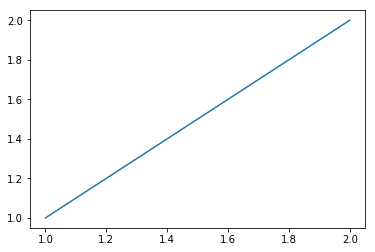

In [2]:
plt.plot([1,2], [1,2])

Je kunt die uiteinden ook nog van punten of sterren voorzien, door er een scatterplot bovenop te plotten, met eventueel een extra punt:

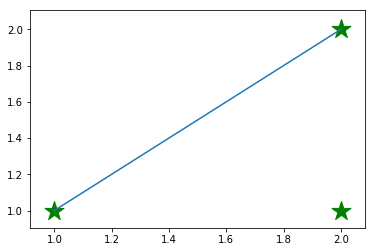

In [3]:
plt.plot([1,2], [1,2])
plt.scatter([1,2, 2], [1,2, 1], marker="*", c='green', s=400)
# plt.xlabel('Dit staat langs de x-as')
# plt.text(1.2, 1.8, 'tekst in je grafiek!')
# plt.xlabel('Dit moet ook langs de as!', fontsize=23)

Je ziet dat in deze modus elke vlgende regel gewoon iets doet met je grafiek en deze direct verandert. Een nieuwe plot moet vanuit een nieuwe cell, tenzij je een figuur maakt die uit twee panels bestaat, dan kun je ze een voor een vullen. Als je echter weer terug gaat naar de eerste dan maak je gewoon weer een nieuw figuur eroverheen:

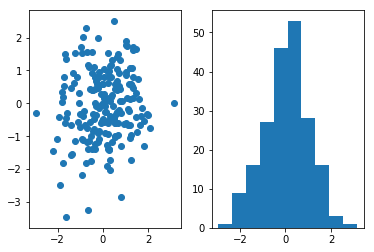

In [4]:
plt.subplot(121)
x = np.random.standard_normal(size=200)
y = np.random.standard_normal(size=200)
plt.scatter(x, y)
plt.subplot(122)
plt.hist(x);

/home/marcel/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


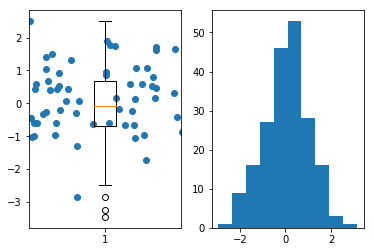

In [5]:
plt.subplot(121)
plt.scatter(x, y)
plt.subplot(122)
plt.hist(x)
plt.subplot(121)
plt.boxplot(y);    # De boxplot hier heeft het asbereik veranderd!

***
### Objectgeorienteerde modus voor plotten

In de hierboven beschreven "interactieve modus" houdt de Python interpreter steeds bij welke figuur-object het huidige actieve object is. Je kunt al deze afzonderlijke objecten ook benoemen en als losse entiteiten steeds manipuleren. Wat je daarvoor kunt doen is een plot-object definieren en daar attributen van manipuleren. Dit geeft je iets meer vrijheid en controle, maar het kost je iets meer typewerk. Wat hierboven niet duidelijk was, maar wel degelijk aan de hand was, is dat er een "Figure" object bestaat en een "Axes" object. Je kunt dit checken met de plt.gca() (get current axes) en plt.gcf() (get current figure) routines. In de object georienteerde modus wordt dit explicitiet.


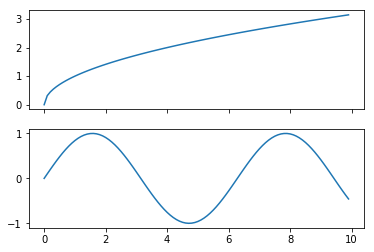

In [6]:
x = np.arange(0,10,0.1)
y = np.sqrt(x)
z = np.sin(x)
# definieer een figuur en assen object:
fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(x, y)
ax[1].plot(x, z)

# ax[1].set_xlabel('X')
# ax[0].set_ylabel('De wortel')
# ax[1].set_xlim([-2, 12])

# ymax = np.max(np.abs([ax[i].get_ylim() for i in range(2)]))
# ax[0].set_ylim([-ymax, ymax])
# ax[1].set_ylim(ax[0].get_ylim())

# fig.set_size_inches(8, 12)

De mogelijkheden van matplotlib worden mooi geillustreerd, met voorbeeldcode, in de matplotlib gallery: https://matplotlib.org/gallery.html

## Seaborn
Seaborn is een pakket dat speciaal gemaakt is voor "statistische plots". Het is bij uitstek geschikt om datasets visueel te leren kennen en kent een schat aan mogelijkheden. 

Het importeren van seaborn heeft wel een onverwacht effect: het verandert potentieel het uiterlijk van je plots. Ook die van matplotlib. De standaard layout parameters worden overschreven, en dat kun je mooi vinden, of niet. Je kunt ook seaborn plots in een andere "context" maken, wat je matplotlib plots ook verandert, maar dan naar een stijl die je misscjien wel mooi vindt. De reden dat dit zo werkt is dat seaborn eigenlijk een schil om matplotlib heen is: code wordt gegenereerd in matplotlib en het importeren van seaborn voert code uit die default parameters (ook wel rcParams genoemd) overschrijft zodat niet elk plotobject weer opnieuw waarden hoeft aan te passen.

Om gelijk maar met een mooie showcase in huis te vallen:

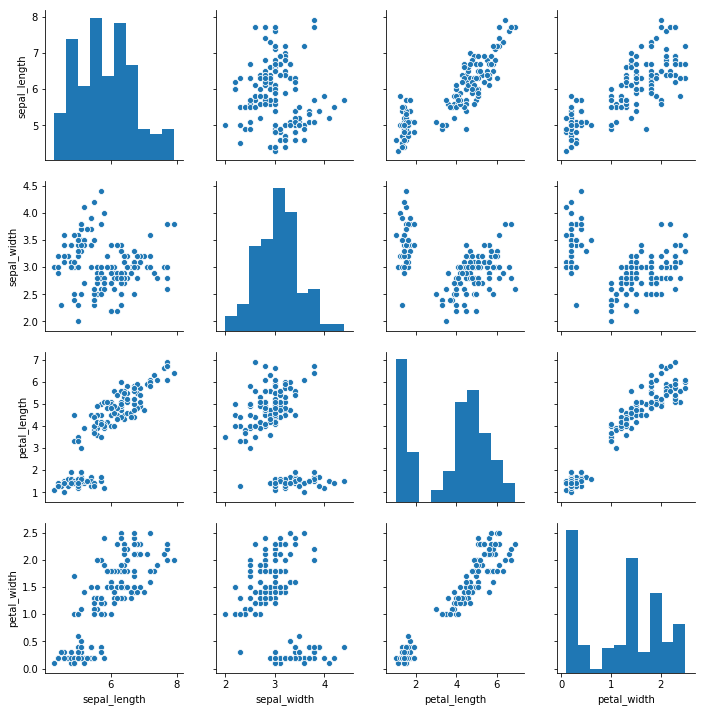

In [7]:
import seaborn as sns

sns.pairplot(sns.load_dataset('iris') )

Met 1 regel code hebben we 16 plotjes gegenereerd (of 10, als je de dubbele niet meetelt). De dataset die ik hier heb ingeladen is de beroemde "iris" dataset, een set met verschillende soorten bloemen. Daarover bestaan per bloem 4 verschillende waarden (zie de assen) en een label: het soort bloem. Seaborn is bedoeld om datasets snel te verkennen en deze pairplot maakt een scatterplot van alle numerieke variabelen tegen alle andere numerieke variabelen en zet een histogram op de diagonaal. Handig!

Gebruik je nu het extra keyword (zie voor andere opties de documentatie) "hue=" met het label van de bloemen ('species') dan zie je dat er mooie kleurtjes worden gebruikt per label, maar ook dat dat weer de definitie van de diagonaal verandert naar iets wat seaborn logischer vindt. Dit is weer allemaal aan te passen als je wil.

In [8]:
iris = sns.load_dataset('iris')
print(len(iris))
iris.head()

150


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/home/marcel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


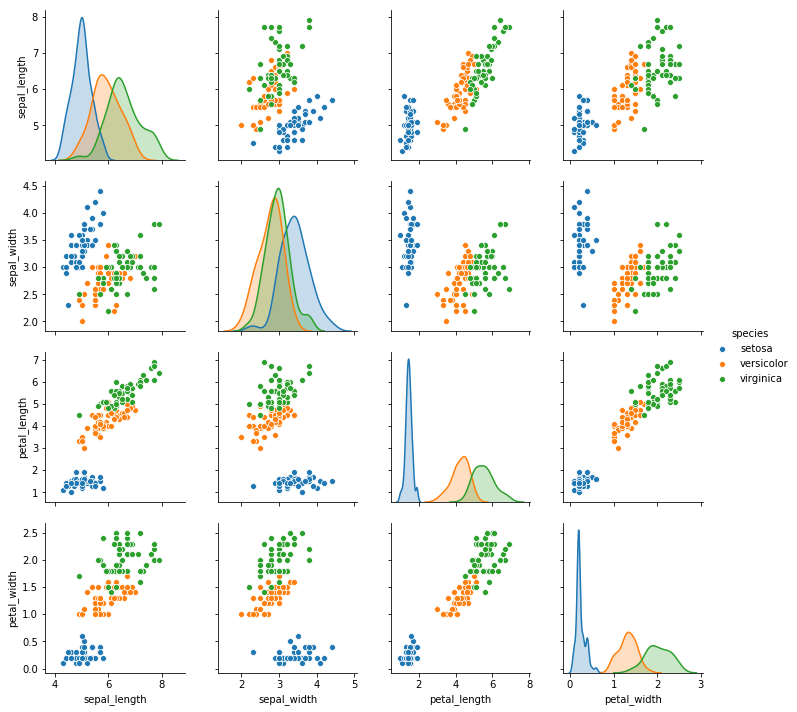

In [9]:
sns.pairplot(iris, hue='species', )

/home/marcel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


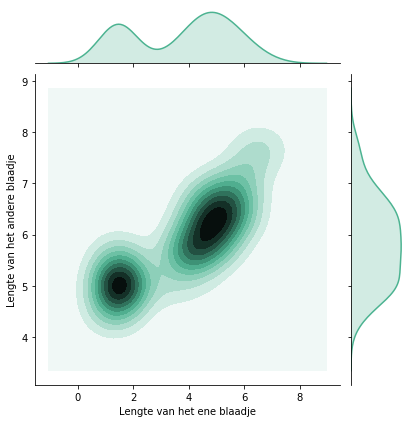

In [10]:
pp = sns.jointplot(iris.petal_length, iris.sepal_length, kind='kde', color="#4CB391")    # of kind='hex', 'kde', 'reg'
pp.set_axis_labels("Lengte van het ene blaadje", "Lengte van het andere blaadje")

Maar er is meer! Hieronder volgen nog voorbeelden, en ook seaborn kent een gallery van voorbeelden met volledige code: https://seaborn.pydata.org/examples/index.html

/home/marcel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


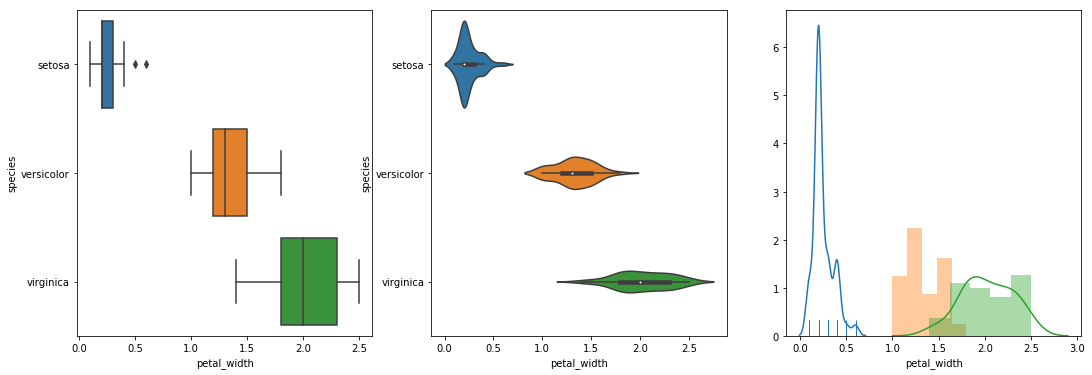

In [11]:
plt.figure(figsize=(18,6))
plt.subplot(131)
sns.boxplot(data=iris, y='species', x='petal_width')
plt.subplot(132)
sns.violinplot(data=iris, y='species', x='petal_width')
plt.subplot(133)
sns.distplot(iris.petal_width[iris.species == "setosa"], rug=True, hist=False)
sns.distplot(iris.petal_width[iris.species == "versicolor"], kde=False, norm_hist=True)
sns.distplot(iris.petal_width[iris.species == "virginica"])

***
## Bokeh

Om interactive plots te maken zijn er een aantal front-ends vanuit Python, veelal voor javascript die de interactieve plots maakt. Bokeh is het bekendste voorbeeld daarvan. In veel tutorials zul je wellicht Bokeh terugzien. Ik kies er hier echter voor om Bokeh niet te behandelen en in plaats daarvan Altair te verkennen, om meerdere redenen:
- Bokeh werkt niet altijd even soepel in Jupyter Lab. Altair gaat uit van de Jupyter Lab omgeving (en heeft weinig extra's nodig om in een klassiek Notebook te werken).
- De interface van Bokeh, terwijl deze niet ingewikkeld is, staat iets verde af van de "grammar of visualization" (zie pdf van de presentatie).
- Altair is lichtgewicht en eenvoudig te exporteren naar interactive graphics op bijvoorbeeld het internet, door de export naar Vega-Lite json files.
- Altair kan met online data in json overweg en nog veel meer, maar is vooral uitstekend geschikt voor pandas DataFrames.
- Ik denk dat je hiermee de toekomst van visualisatie te pakken hebt.


## Altair - declarative plotting
In Altair is goed nagedacht over de interface voor het plotten. Het gaat om wat je wil zien, niet hoe je dat wilt zien. In veel andere packages moet je beide dingen bedenken, in Altair is dat anders. Zie de Deel3.pdf voor meer details hierover. Hier gaan we direct over tot de orde van de dag en gaan we aan het plotten. We beginnen met het inladen van een data set over auto's uit vega_datasets (als je deze package niet hebt is deze met een eenvoudige "conda install vega_datasets" in de terminal te installeren).

De website van Altair vind je op https://altair-viz.github.io/

In [12]:
import altair as alt
from vega_datasets import data

cars = data.cars()
print(len(cars))
cars.head()

406


,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


Nu bouwen we langzaam onze eerste Altair plot op. We willen een Chart maken van deze data, en voor nu gebruiken we de marker "mark_point".

In [13]:
alt.Chart(cars).mark_point()

In deze "plot" staan alle 406 punten over elkaar heen, 1 voor elke rij van de data. We hebben immers alleen gespecificeerd wat de data set was (406 observaties) en dat we een "mark_point" willen gebruiken. We moeten dus nog mappings aanbrengen voor waar we de punten willen hebben. Dit doen we met de encode-methode:

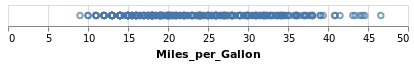

In [14]:
alt.Chart(cars).mark_point().encode(
    x="Miles_per_Gallon",
#     y="Horsepower",
#     color="Origin"              # Probeer voor niet-nominale waarden ook: "Cylinders":O   LET OP DE CHARACTER ENCODING!
)

We zien in het voorbeeld met cylinders als kleurenvariabele ook direct de character encoding terug. Altair gokt wat voor type data je data is en past de visualisatie op je keuze aan. Het aantal cylinders ziet eruit als een getal, dus wordt de standaard voor getalswaarden in kleur gebruikt: een geleidende schaal. Je kunt echter niet 2.37 cylinders hebben, dus eigenlijk hebben we te maken met een zogenaamde "ordinal value": categorieen met een volgorde. Altair kent:
- Q: quantitative: getalswaarden met een geleidende schaal.
- N: nominal: categorische waarden ('labels').
- O: ordinal: categorische waarden met een volgorde (bijv. "klein", "groot", "enorm")
- T: temporal: getalswaarden met eigenschappen van een datumveld.

Als je wat speelt met de volgorden en rollen van verschillende kwantitatieve, categorische en nominale waarden in de x, y en color encoding, voor zowel point als bar charts dan zie je vanzelf wat voor keuzes Altair graag maakt:

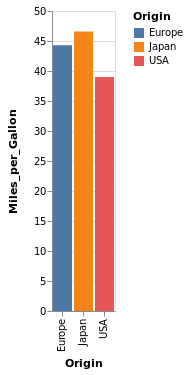

In [15]:
alt.Chart(cars).mark_bar().encode(           # Check zowel mark_point als mark_bar
    y="Miles_per_Gallon",                    # WAT GEBEURT HIER?
    x="Origin",                              # Speel met allemaal combinaties
    color="Origin"
)

***

### Impliciete aggregaties

Altair is goed in aggregaties en zoekt op de achtergrond voor je uit wat er moet gebeuren. Om alternatieve variabelen langs je assen te gebruiken kun je alt.X in je encoding gebruiken op de volgende manier:

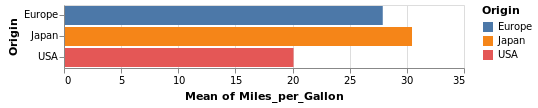

In [16]:
alt.Chart(cars).mark_bar().encode(
    alt.X('mean(Miles_per_Gallon)'),
    y='Origin',
    color="Origin"
)

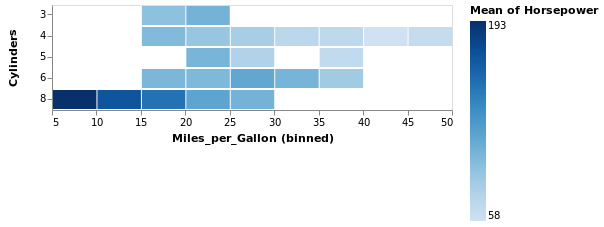

In [17]:
alt.Chart(cars).mark_bar().encode(
    alt.X("Miles_per_Gallon", bin=True),     # Impliciete heatmap. Kan ook met mark_rect()
    y="Cylinders:O",
    color=alt.Color("mean(Horsepower)")
)

***
### Interactiviteit.

Altair werkt uiteindelijk op javascript en is dus goed in interactiviteit, dat wil zeggen: acties met je muis in een browser. Wanneer je aan het simpele plotje gewoon een extra methode .interactive() toevoegt dan wordt je plot interactief in de zin dat je kunt zoomen en bewegen. Er kan echter meer!

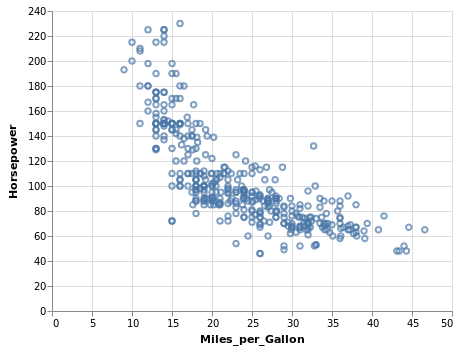

In [18]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower'
).interactive()


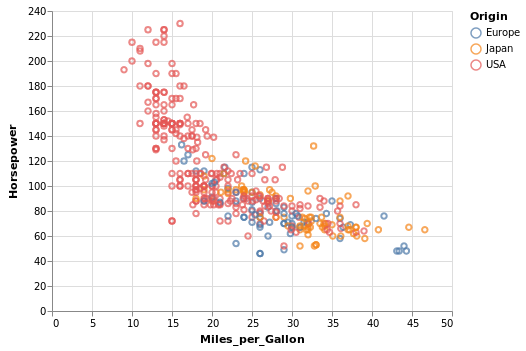

In [21]:
# De interactiviteit kan ook een interval selecteren
interval = alt.selection_interval()   # encodings=['x']

alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon'],  # Voor het voorbeeld: een tooltip.
    color="Origin"   
#     color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection=interval
)


Je kunt het zo gek niet bedenken. Je kunt de dichtsbijzijnde altijd selecteren, met mouseover selecteren, 1 punt, of meerdere punten tegelijk selecteren en nog ene hoop meer. Bekijk de Altair documentatie voor wat er allemaal kan!

Met selecties kun je ook de grafiek ernaast of eronder filteren:


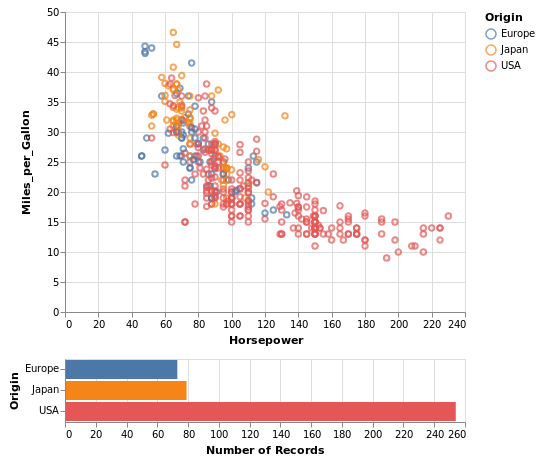

In [20]:
# Zorg dat je intervals kunt selecteren
interval = alt.selection_interval()

#Een scatter diagram zoals we dat inmiddels gewend zijn:
scatter = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(interval, 'Origin:N', alt.value('lightgray'))   # Doe funky dingen met de kleuren van selectie vs niet.
).properties(
    selection=interval           # Zorg dat je kunt selecteren in dit panel.
)

# Histogrammetje erbij van origin.
hist = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin',
    color='Origin'
).transform_filter(
    interval                    # Zorg dat het interval (zie definitie bovenaan en de selection property in de scatter plot) hier filtert.
)

scatter & hist                  # Laat ze boven elkaar zien.




***

Er zijn nog zat onderwerpen van altair die niet besproken zijn. Wil je meer, dan raad ik je van harte aan te kijken op https://altair-viz.github.io/. Altair is nog in actieve ontwikkeling, maar nu al een fantastisch pakket!


## Referenties

Python Data Science Handbook (en al het andere youtube- en blogmateriaal van auteur Jake VanderPlas, zie http://jakevdp.github.io/), geheel in notebooks op github: https://jakevdp.github.io/PythonDataScienceHandbook/. Het pandas boek van Wes McKinney: https://github.com/wesm/pydata-book

Antwoorden op al je vragen (of ze staan er al, of je hebt ze snel) op StackOverflow: https://stackoverflow.com/

Documentatie van de voor data science belangrijke paketten: https://docs.scipy.org/doc/, http://pandas.pydata.org/pandas-docs/stable/

Voor visualisatie gebruiken we matplotlib (https://matplotlib.org/ en de gallery op https://matplotlib.org/gallery/index.html), seaborn (https://seaborn.pydata.org/) en altair (https://altair-viz.github.io/).

Verder vind je op YouTube veel praatjes en workshops (vaak met materiaal op github). Let er wel op dat je redelijk recent materiaal bekijkt, sommige van deze paketten zijn nog stevig in ontwikkeling. Op YouTube kun je zoeken naar PyData, (Euro)SciPy, Pycon, Enthought en Numfocus. Dat geeft je een hele hoop materiaal.